In [1]:
import pandas as pd
import re
import os
import ast
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Export files preprocessing

In [2]:
df_labled = pd.read_csv("C:/N/st/UCU/5sem2024_DIPLOMA/Manipulation/code/my_master/datasets/upsampling/labeled_data.csv")
df_generated = pd.read_csv("C:/N/st/UCU/5sem2024_DIPLOMA/Manipulation/code/labels/generated_texts/generated_texts.csv")

In [3]:
df_generated

,message_id,message_clean,annotation_new,name
0,60010,або водії дотримуються правил дорожнього руху...,"{'name': 'Black_White', 'start': 0, 'end': 84}",Black_White
1,60020,"якщо не ремонтувати дорогу, то автомобілісти ...","{'name': 'Black_White', 'start': 0, 'end': 122}",Black_White
2,60030,"чи люди будуть стояти в заторах далі, чи можн...","{'name': 'Black_White', 'start': 0, 'end': 69}",Black_White
3,60040,у харкові планується витратити мільйон гривень...,"{'name': 'Black_White', 'start': 160, 'end': 260}",Black_White
4,60050,"громадський активіст заявив, що ремонт туалету...","{'name': 'Black_White', 'start': 107, 'end': 196}",Black_White
...,...,...,...,...
2089,54010,українці періодично просять притулку в європі...,"{'name': 'Doubts_other', 'start': 0, 'end': 86}",Doubts_other
2090,54020,"українці знову просять притулку в європі, але...","{'name': 'Doubts_other', 'start': 0, 'end': 66}",Doubts_other
2091,54030,українці як завжди звертаються за притулком в...,"{'name': 'Doubts_other', 'start': 0, 'end': 93}",Doubts_other
2092,54040,українці звичайно знову звертаються за притул...,"{'name': 'Doubts_other', 'start': 0, 'end': 83}",Doubts_other


In [4]:
df = pd.concat([df_generated, df_labled], ignore_index=True)

In [5]:
df

,message_id,message_clean,annotation_new,name
0,60010,або водії дотримуються правил дорожнього руху...,"{'name': 'Black_White', 'start': 0, 'end': 84}",Black_White
1,60020,"якщо не ремонтувати дорогу, то автомобілісти ...","{'name': 'Black_White', 'start': 0, 'end': 122}",Black_White
2,60030,"чи люди будуть стояти в заторах далі, чи можн...","{'name': 'Black_White', 'start': 0, 'end': 69}",Black_White
3,60040,у харкові планується витратити мільйон гривень...,"{'name': 'Black_White', 'start': 160, 'end': 260}",Black_White
4,60050,"громадський активіст заявив, що ремонт туалету...","{'name': 'Black_White', 'start': 107, 'end': 196}",Black_White
...,...,...,...,...
5561,1636685,польща голосує за зміну влади: що це означає і...,"{'name': 'Doubts_partners', 'start': 968, 'end...",Doubts_partners
5562,1636685,польща голосує за зміну влади: що це означає і...,"{'name': 'Doubts_partners', 'start': 1183, 'en...",Doubts_partners
5563,1636698,"""орбан"" із гааги: чи зможе противник допомоги ...","{'name': 'Emotion_other', 'start': 413, 'end':...",Emotion_other
5564,1636698,"""орбан"" із гааги: чи зможе противник допомоги ...","{'name': 'Emotion_other', 'start': 413, 'end':...",Emotion_other


In [6]:
print(len(df) == len(df_generated)+len(df_labled))

True


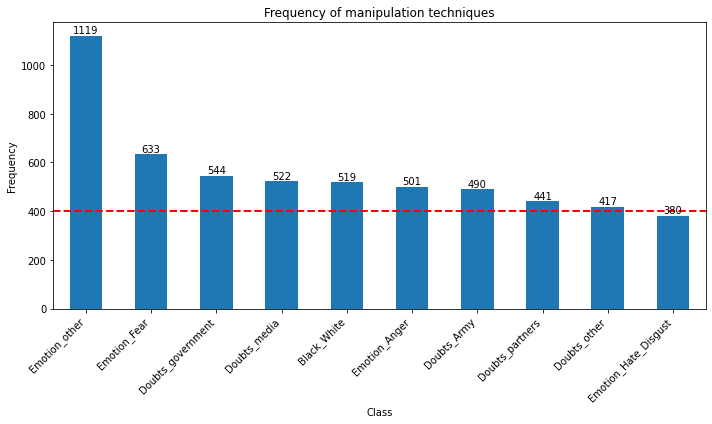

In [7]:
# Count the occurrences of each class
classes = df["name"].value_counts()

# Plot the frequency of each class
plt.figure(figsize=(10, 6))
ax = classes.plot(kind='bar')
plt.title('Frequency of manipulation techniques')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')

# Add numbers on top of the bar
for i, v in enumerate(classes):
    ax.text(i, v+10, str(v), ha='center')
    
# Add red line
plt.axhline(y=400, color='r', linestyle='--', linewidth=2)

plt.tight_layout()
plt.show()

In [8]:
# Function to convert string representations to dictionaries
def convert_to_dict(annotation):
    return ast.literal_eval(annotation)

# Convert string representations to dictionaries
df['annotation_new'] = df['annotation_new'].apply(convert_to_dict)

# Function to convert dictionary values to integers
def convert_to_int(annotation):
    return {'name': annotation['name'], 'start': int(annotation['start']), 'end': int(annotation['end'])}

# Apply the function to the 'annotation_new' column
df['annotation_new'] = df['annotation_new'].apply(convert_to_int)

In [10]:
df

,message_id,message_clean,annotation_new,name
0,60010,або водії дотримуються правил дорожнього руху...,"{'name': 'Black_White', 'start': 0, 'end': 84}",Black_White
1,60020,"якщо не ремонтувати дорогу, то автомобілісти ...","{'name': 'Black_White', 'start': 0, 'end': 122}",Black_White
2,60030,"чи люди будуть стояти в заторах далі, чи можн...","{'name': 'Black_White', 'start': 0, 'end': 69}",Black_White
3,60040,у харкові планується витратити мільйон гривень...,"{'name': 'Black_White', 'start': 160, 'end': 260}",Black_White
4,60050,"громадський активіст заявив, що ремонт туалету...","{'name': 'Black_White', 'start': 107, 'end': 196}",Black_White
...,...,...,...,...
5561,1636685,польща голосує за зміну влади: що це означає і...,"{'name': 'Doubts_partners', 'start': 968, 'end...",Doubts_partners
5562,1636685,польща голосує за зміну влади: що це означає і...,"{'name': 'Doubts_partners', 'start': 1183, 'en...",Doubts_partners
5563,1636698,"""орбан"" із гааги: чи зможе противник допомоги ...","{'name': 'Emotion_other', 'start': 413, 'end':...",Emotion_other
5564,1636698,"""орбан"" із гааги: чи зможе противник допомоги ...","{'name': 'Emotion_other', 'start': 413, 'end':...",Emotion_other


In [11]:
df = df[["message_id", "message_clean", "annotation_new"]]
merged_df = df.groupby('message_id').agg({'message_clean': 'first', 'annotation_new': lambda x: x.tolist()}).reset_index()
merged_df

,message_id,message_clean,annotation_new
0,20010,знову зявилися сумніви щодо ефективності кері...,"[{'name': 'Doubts_Army', 'start': 0, 'end': 303}]"
1,20020,чи то керівництво зсу спеціально неприділяє у...,"[{'name': 'Doubts_Army', 'start': 0, 'end': 234}]"
2,20030,знову поступають повідомлення про втечі війсь...,"[{'name': 'Doubts_Army', 'start': 0, 'end': 232}]"
3,20040,"скоріше за все, керівництво зсу знову не пікл...","[{'name': 'Doubts_Army', 'start': 0, 'end': 236}]"
4,20050,ветерани війни в україні знову звернуться із з...,"[{'name': 'Doubts_Army', 'start': 106, 'end': ..."
...,...,...,...
3958,1636679,що розповів зеленський на пресконференції? зіб...,"[{'name': 'Doubts_government', 'start': 800, '..."
3959,1636685,польща голосує за зміну влади: що це означає і...,"[{'name': 'Emotion_other', 'start': 879, 'end'..."
3960,1636698,"""орбан"" із гааги: чи зможе противник допомоги ...","[{'name': 'Emotion_other', 'start': 413, 'end'..."
3961,1637606,скандал із співробітником віськомату в запоріж...,"[{'name': 'Doubts_Army', 'start': 0, 'end': 35..."


In [12]:
merged_df["message_id"].nunique()

3963

## Devide to train and dev 

In [13]:
train_ids, dev_ids = train_test_split(merged_df["message_id"].unique(), test_size=0.15, random_state=108)
# Filter the data based on the train and test IDs
train_df = merged_df[merged_df['message_id'].isin(train_ids)]
dev_df = merged_df[merged_df['message_id'].isin(dev_ids)]
print(len(train_df))
print(len(dev_df))

3368
595


In [14]:
# # Check the frequences of each class in train df
all_names = [item['name'] for sublist in train_df['annotation_new'] for item in sublist]

# Count occurrences of each unique 'name'
name_counts = pd.Series(all_names).value_counts(normalize=True)
print(name_counts)

Emotion_other           0.203006
Emotion_Fear            0.113675
Doubts_government       0.099280
Doubts_media            0.095047
Black_White             0.092295
Emotion_Anger           0.089543
Doubts_Army             0.087849
Doubts_partners         0.079805
Doubts_other            0.074725
Emotion_Hate_Disgust    0.064776
dtype: float64


In [15]:
# # Check the frequences of each class in dev df
all_names = [item['name'] for sublist in dev_df['annotation_new'] for item in sublist]

# Count occurrences of each unique 'name'
name_counts = pd.Series(all_names).value_counts(normalize=True)
print(name_counts)

Emotion_other           0.190024
Emotion_Fear            0.114014
Black_White             0.098575
Emotion_Anger           0.092637
Doubts_Army             0.089074
Doubts_government       0.089074
Emotion_Hate_Disgust    0.087886
Doubts_media            0.086698
Doubts_partners         0.076010
Doubts_other            0.076010
dtype: float64


#### Calculate weights for each class in train df

In [16]:
techniques = "C:/N/st/UCU/5sem2024_DIPLOMA/Manipulation/code/my_master/propaganda-techniques-names.txt"
class_dict = {}  #to dictionary
label = 0
with open(techniques, "r") as f:
  for technique in f:
    class_dict[technique.replace("\n", "")] = int(label)
    label += 1

In [17]:
def calculate_class_weights(df):
    """
    Calculates class weights based on the frequency of each class in the dataset
    """
    class_counts = df.value_counts()
    total_samples = len(df)
    class_weights = total_samples / class_counts
    return class_weights

# Calculate class weights
df_fr = pd.DataFrame(all_names, columns=['Class'])
df_fr['Class'] = df_fr['Class'].map(class_dict)
class_weights = calculate_class_weights(df_fr['Class'])
class_weights

9     5.262500
6     8.770833
5    10.144578
7    10.794872
1    11.226667
0    11.226667
8    11.378378
2    11.534247
3    13.156250
4    13.156250
Name: Class, dtype: float64

In [18]:
# # Save class weights to a text file
with open('C:/N/st/UCU/5sem2024_DIPLOMA/Manipulation/code/my_master/datasets/upsampling/class_weights_10_numbers_upsampling.txt', 'w') as f:
    for class_name, weight in class_weights.items():
        f.write(f"{class_name}: {weight}\n")

## Save train and dev datasets

In [105]:
# Save train and def
train_df.to_csv("C:/N/st/UCU/5sem2024_DIPLOMA/Manipulation/code/my_master/datasets/upsampling/input_train_new.csv", index=False)
dev_df.to_csv("C:/N/st/UCU/5sem2024_DIPLOMA/Manipulation/code/my_master/datasets/upsampling/input_dev_new.csv", index=False)

In [106]:
# Save text for train 
output_dir = "C:/N/st/UCU/5sem2024_DIPLOMA/Manipulation/code/my_master/datasets/upsampling/train"

# Initialize tqdm progress bar
pbar = tqdm(total=len(train_df), desc='Saving Files')

# Iterate over each row in the DataFrame
for _, row in train_df.iterrows():
    # Extract message_id
    message_id = row["message_id"]
    text = row["message_clean"]

    # Create file name
    file_name = f"article{message_id}.txt"
    
    # Write the content to a file
    with open(os.path.join(output_dir, file_name), "w", encoding='utf-8') as file:
        file.write(text)
        
    # Update tqdm progress bar
    pbar.update(1)

print("All files are saved.")

Saving Files:  98%|█████████▊| 3314/3368 [00:01<00:00, 2057.48it/s]

All files are saved.


In [107]:
# Save text for dev 
output_dir = "C:/N/st/UCU/5sem2024_DIPLOMA/Manipulation/code/my_master/datasets/upsampling/dev"

# Initialize tqdm progress bar
pbar = tqdm(total=len(dev_df), desc='Saving Files')

# Iterate over each row in the DataFrame
for _, row in dev_df.iterrows():
    # Extract message_id
    message_id = row["message_id"]
    text = row["message_clean"]

    # Create file name
    file_name = f"article{message_id}.txt"
    
    # Write the content to a file
    with open(os.path.join(output_dir, file_name), "w", encoding='utf-8') as file:
        file.write(text)
        
    # Update tqdm progress bar
    pbar.update(1)

print("All files are saved.")


Saving Files: 100%|██████████| 3368/3368 [00:11<00:00, 292.84it/s] 

Saving Files:  78%|███████▊  | 466/595 [00:00<00:00, 1424.03it/s]

All files are saved.


#### SI

In [108]:
# Save labels for train for SI
output_dir = "C:/N/st/UCU/5sem2024_DIPLOMA/Manipulation/code/my_master/datasets/upsampling/train_SI_labels"

# Initialize tqdm progress bar
pbar = tqdm(total=len(train_df), desc='Saving Files')

# Iterate over each row in the DataFrame
for _, row in train_df.iterrows():
    # Extract message_id
    message_id = row["message_id"]
    
    # Create an empty list to store the lines to be written to the file
    lines = []

    # Iterate over each annotation in the 'annotations' column
    for annotation in row["annotation_new"]:
        # Extract information from the annotation
        start = annotation["start"]
        end = annotation["end"]
        
        # Construct the line to be written to the file
        line = f"{message_id}\t{start}\t{end}"
        
        # Append the line to the list
        lines.append(line)


    # Join all lines with newline characters to create the content of the file
    file_content = "\n".join(lines)
    # Create file name
    file_name = f"article{message_id}.labels.tsv"
    
    # Write the content to a file
    with open(os.path.join(output_dir, file_name), "w", encoding='utf-8') as file:
        file.write(file_content)
        
    # Update tqdm progress bar
    pbar.update(1)

print("All files are saved.")

Saving Files:  96%|█████████▋| 3249/3368 [00:01<00:00, 1447.03it/s]

All files are saved.


In [109]:
# Save labels for dev for SI
output_dir = "C:/N/st/UCU/5sem2024_DIPLOMA/Manipulation/code/my_master/datasets/upsampling/dev_SI_labels"

# Initialize tqdm progress bar
pbar = tqdm(total=len(dev_df), desc='Saving Files')

# Iterate over each row in the DataFrame
for _, row in dev_df.iterrows():
    # Extract message_id
    message_id = row["message_id"]
    
    # Create an empty list to store the lines to be written to the file
    lines = []

    # Iterate over each annotation in the 'annotations' column
    for annotation in row["annotation_new"]:
        # Extract information from the annotation
        start = annotation["start"]
        end = annotation["end"]
        
        # Construct the line to be written to the file
        line = f"{message_id}\t{start}\t{end}"
        
        # Append the line to the list
        lines.append(line)


    # Join all lines with newline characters to create the content of the file
    file_content = "\n".join(lines)
    # Create file name
    file_name = f"article{message_id}.labels.tsv"
    
    # Write the content to a file
    with open(os.path.join(output_dir, file_name), "w", encoding='utf-8') as file:
        file.write(file_content)
        
    # Update tqdm progress bar
    pbar.update(1)

print("All files are saved.")


Saving Files: 100%|██████████| 3368/3368 [00:18<00:00, 184.51it/s] 

Saving Files:  77%|███████▋  | 460/595 [00:00<00:00, 1373.24it/s]

All files are saved.


In [110]:
# Save truth labels  for techniques
output_dir = "C:/N/st/UCU/5sem2024_DIPLOMA/Manipulation/code/my_master/datasets/upsampling"

lines = []
# Iterate over each row in the DataFrame
for _, row in dev_df.iterrows():
    # Extract message_id
    message_id = row["message_id"]

    # Iterate over each annotation in the 'annotations' column
    for annotation in row["annotation_new"]:
        # Extract information from the annotation
        start = annotation["start"]
        #name = annotation["name"]
        end = annotation["end"]
        
        # Construct the line to be written to the file
        line = f"{message_id}\t{start}\t{end}"
        
        # Append the line to the list
        lines.append(line)

# Join all lines with newline characters to create the content of the file
file_content = "\n".join(lines)
    
# Write the content to a file
with open(os.path.join(output_dir, "SI.labels_true.txt"), "w", encoding='utf-8') as file:
        file.write(file_content)

#### TC 10

In [19]:
# Save labels for train for TC
output_dir = "C:/N/st/UCU/5sem2024_DIPLOMA/Manipulation/code/my_master/datasets/upsampling/train_TC_labels_10_upsampling"

# Initialize tqdm progress bar
pbar = tqdm(total=len(train_df), desc='Saving Files')

# Iterate over each row in the DataFrame
for _, row in train_df.iterrows():
    # Extract message_id
    message_id = row["message_id"]
    
    # Create an empty list to store the lines to be written to the file
    lines = []

    # Iterate over each annotation in the 'annotations' column
    for annotation in row["annotation_new"]:
        # Extract information from the annotation
        name = annotation["name"]
        #token = annotation["token"]
        start = annotation["start"]
        end = annotation["end"]
        
        # Construct the line to be written to the file
        line = f"{message_id}\t{name}\t{start}\t{end}"
        
        # Append the line to the list
        lines.append(line)


    # Join all lines with newline characters to create the content of the file
    file_content = "\n".join(lines)
    # Create file name
    file_name = f"article{message_id}.labels.tsv"
    
    # Write the content to a file
    with open(os.path.join(output_dir, file_name), "w", encoding='utf-8') as file:
        file.write(file_content)
        
    # Update tqdm progress bar
    pbar.update(1)

print("All files are saved.")

Saving Files:  99%|█████████▉| 3328/3368 [00:01<00:00, 2060.77it/s]

All files are saved.


In [20]:
# Save template for techniques pred
output_dir = "C:/N/st/UCU/5sem2024_DIPLOMA/Manipulation/code/my_master/datasets/upsampling/"

lines = []
# Iterate over each row in the DataFrame
for _, row in dev_df.iterrows():
    # Extract message_id
    message_id = row["message_id"]

    # Iterate over each annotation in the 'annotations' column
    for annotation in row["annotation_new"]:
        # Extract information from the annotation
        start = annotation["start"]
        end = annotation["end"]
        
        # Construct the line to be written to the file
        line = f"{message_id}\t?\t{start}\t{end}"
        
        # Append the line to the list
        lines.append(line)

# Join all lines with newline characters to create the content of the file
file_content = "\n".join(lines)
    
# Write the content to a file
with open(os.path.join(output_dir, "TC_labels_for_eval_10_upsampling.txt"), "w", encoding='utf-8') as file:
        file.write(file_content)

In [21]:
# Save truth labels  for techniques
output_dir = "C:/N/st/UCU/5sem2024_DIPLOMA/Manipulation/code/my_master/datasets/upsampling/"

lines = []
# Iterate over each row in the DataFrame
for _, row in dev_df.iterrows():
    # Extract message_id
    message_id = row["message_id"]

    # Iterate over each annotation in the 'annotations' column
    for annotation in row["annotation_new"]:
        # Extract information from the annotation
        start = annotation["start"]
        name = annotation["name"]
        end = annotation["end"]
        
        # Construct the line to be written to the file
        line = f"{message_id}\t{name}\t{start}\t{end}"
        
        # Append the line to the list
        lines.append(line)

# Join all lines with newline characters to create the content of the file
file_content = "\n".join(lines)
    
# Write the content to a file
with open(os.path.join(output_dir, "TC.labels_true_10_upsampling.txt"), "w", encoding='utf-8') as file:
        file.write(file_content)